# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metrics"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15 # Convert from Kelvin to Celsius
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp, # In Celsius
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | yuanping
Processing Record 5 of Set 1 | biltine
Processing Record 6 of Set 1 | gislaved
Processing Record 7 of Set 1 | mumbwa
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | senanga
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | mogocha
Processing Record 15 of Set 1 | launceston
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | saint-joseph
Processing Record 18 of Set 1 | alliance
Processing Record 19 of Set 1 | keetmanshoop
Processing Record 20 of Set 1 | saint-pierre
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | shar
Processing Reco

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [65]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,13.87,64,17,9.16,AU,1724983593
1,longyearbyen,78.2186,15.6401,10.91,76,75,3.09,SJ,1724983358
2,adamstown,-25.0660,-130.1015,18.95,68,61,6.28,PN,1724983379
3,yuanping,38.7153,112.7575,26.72,53,27,0.61,CN,1724983596
4,biltine,14.5333,20.9167,24.98,83,100,2.50,TD,1724983597


In [67]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,13.87,64,17,9.16,AU,1724983593
1,longyearbyen,78.2186,15.6401,10.91,76,75,3.09,SJ,1724983358
2,adamstown,-25.0660,-130.1015,18.95,68,61,6.28,PN,1724983379
3,yuanping,38.7153,112.7575,26.72,53,27,0.61,CN,1724983596
4,biltine,14.5333,20.9167,24.98,83,100,2.50,TD,1724983597


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

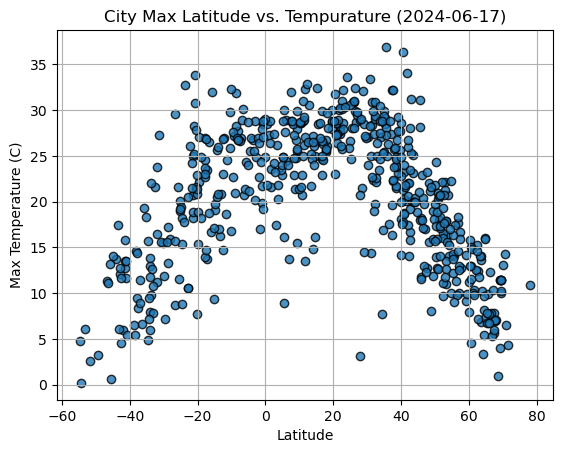

In [72]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Tempurature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

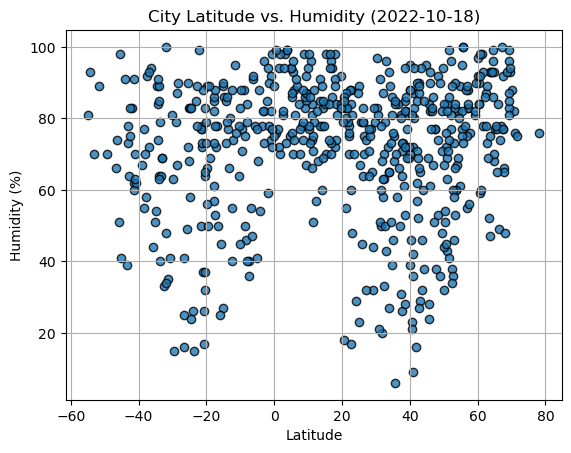

In [75]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

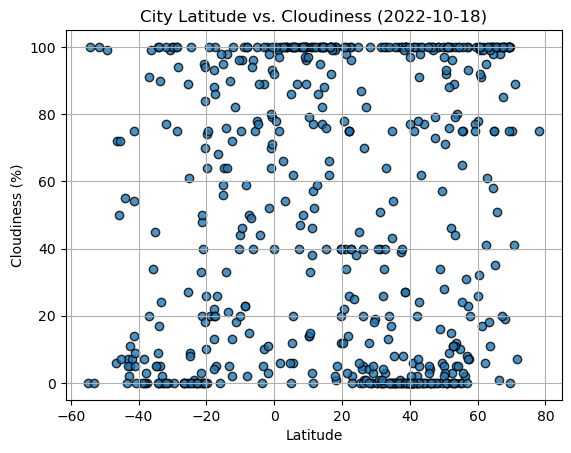

In [78]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

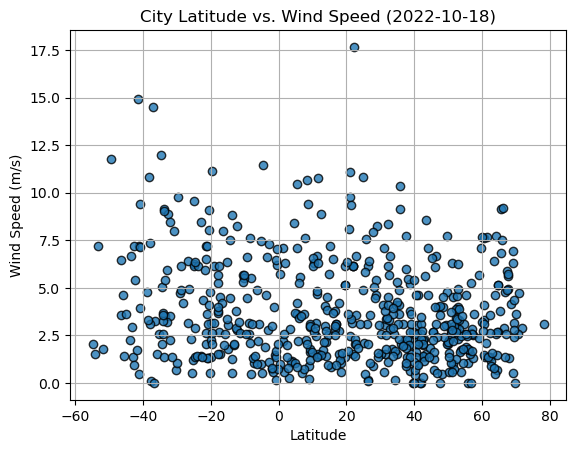

In [81]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line 
    regress_values = x_values * slope + intercept

    # Define line equation 
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Graph properties
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"R squared: {rvalue**2:.2f}")
    plt.show()

In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,longyearbyen,78.2186,15.6401,10.91,76,75,3.09,SJ,1724983358
3,yuanping,38.7153,112.7575,26.72,53,27,0.61,CN,1724983596
4,biltine,14.5333,20.9167,24.98,83,100,2.50,TD,1724983597
5,gislaved,57.3044,13.5408,16.73,83,93,2.53,SE,1724983598
7,bethel,41.3712,-73.4140,20.08,83,100,2.37,US,1724983600


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,13.87,64,17,9.16,AU,1724983593
2,adamstown,-25.0660,-130.1015,18.95,68,61,6.28,PN,1724983379
6,mumbwa,-14.9783,27.0619,19.10,27,56,1.78,ZM,1724983599
9,blackmans bay,-43.0167,147.3167,12.07,73,7,1.34,AU,1724983394
10,senanga,-16.1167,23.2667,16.66,25,0,2.02,ZM,1724983604


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.50


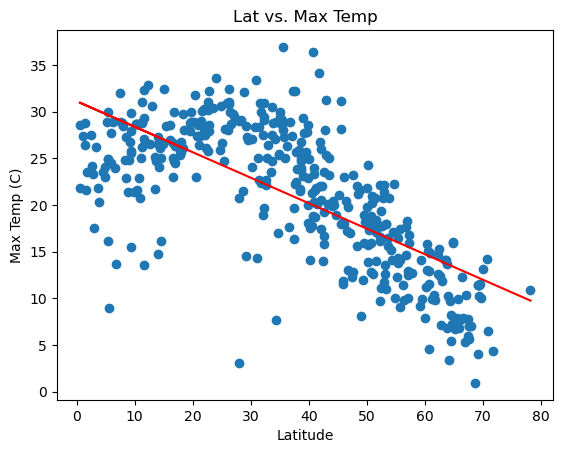

In [91]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Max Temp"],
                      "Lat vs. Max Temp",
                      "Latitude",
                       "Max Temp (C)",
                       (10, -20))

R squared: 0.55


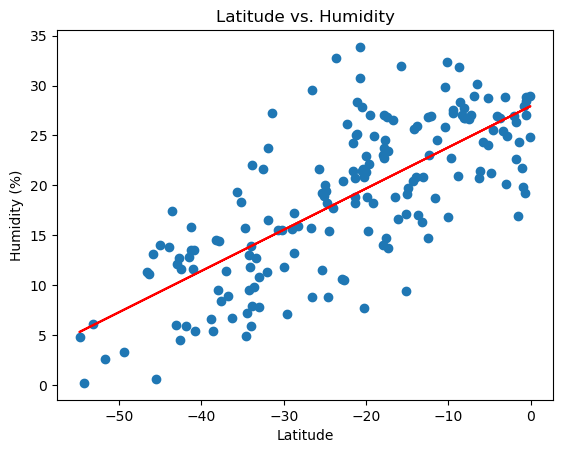

In [93]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                      "Latitude vs. Humidity",
                      "Latitude",
                       "Humidity (%)",
                       (40, 10))

**Discussion about the linear relationship:** Both hemispheres show a clear trend of decreasing temperatures with increasing latitude, affirming that locations farther from the equator generally experience cooler temperatures. Overall, the linear regression plots effectively demonstrate the expected relationship between temperature and latitude, with some variability due to other environmental factors.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.01


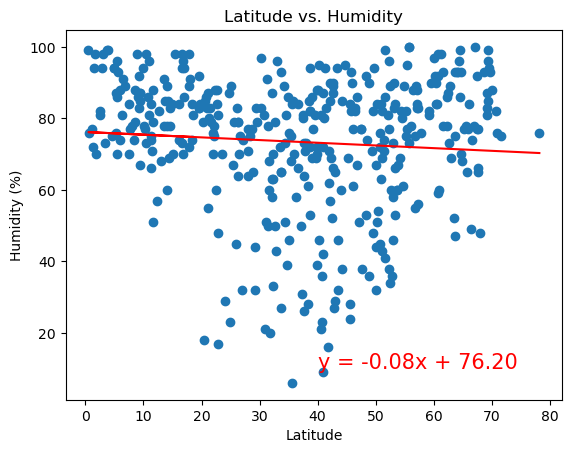

In [97]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Humidity"],
                       "Latitude vs. Humidity",
                       "Latitude",
                       "Humidity (%)",
                       (40, 10))

R squared: 0.00


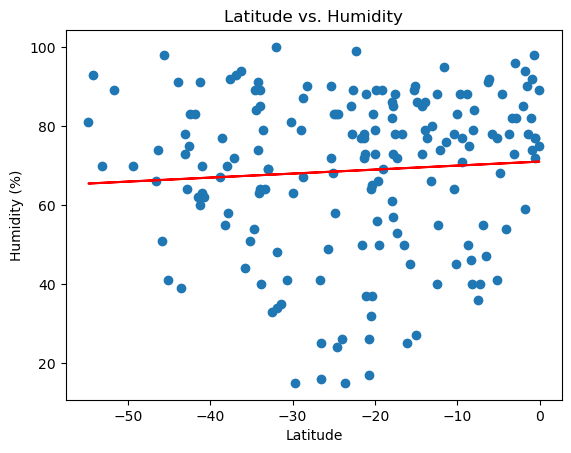

In [99]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Humidity"],
                       "Latitude vs. Humidity",
                       "Latitude",
                       "Humidity (%)",
                       (40, 10))

**Discussion about the linear relationship:** The scatter plot and regression analysis clearly show that there is no linear relationship between humidity and latitude in either hemisphere. Humidity is a complex variable influenced by a variety of factors beyond just geographical latitude, including proximity to water bodies, local climate conditions, atmospheric pressure systems, and weather patterns. As a result, any model or predictive analysis of humidity must consider these multiple variables to provide accurate predictions.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.00


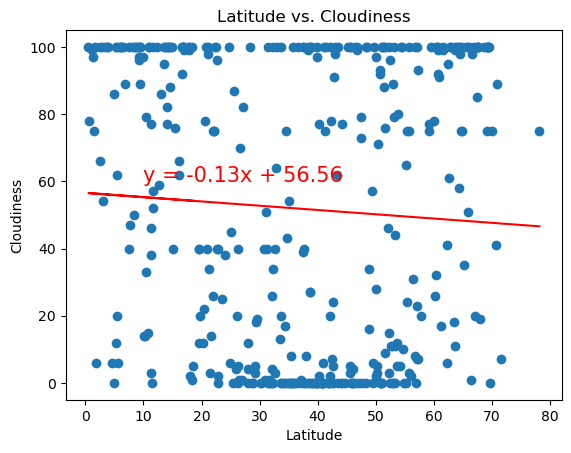

In [103]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       "Latitude vs. Cloudiness",
                       "Latitude",
                       "Cloudiness",
                       (10, 60))

R squared: 0.08


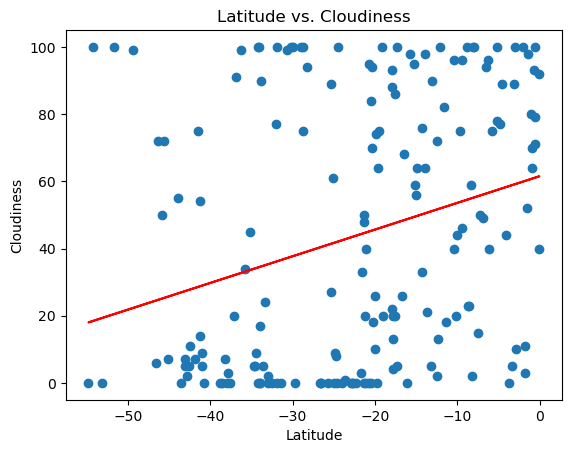

In [105]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       "Latitude vs. Cloudiness",
                       "Latitude",
                       "Cloudiness",
                       (10, 60))

**Discussion about the linear relationship:** The analysis shows that there is no significant linear relationship between cloudiness and latitude in the Northern Hemisphere, and only a very weak one in the Southern Hemisphere. These findings suggest that cloudiness is more influenced by localized meteorological and geographical factors than by latitude. Therefore, latitude should not be considered a key factor when predicting or analyzing cloud cover in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.01


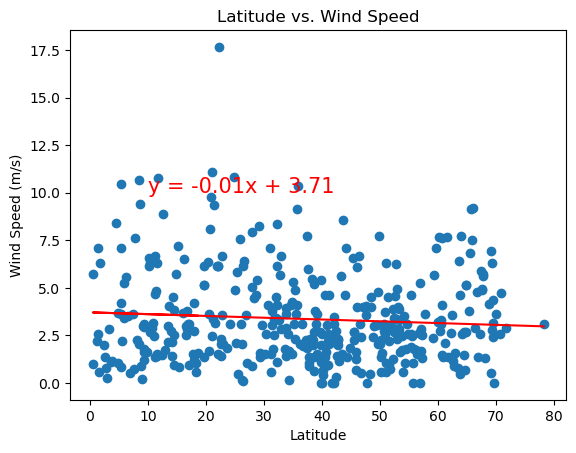

In [109]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"],
                       "Latitude vs. Wind Speed",
                       "Latitude",
                       "Wind Speed (m/s)",
                       (10, 10))

R squared: 0.03


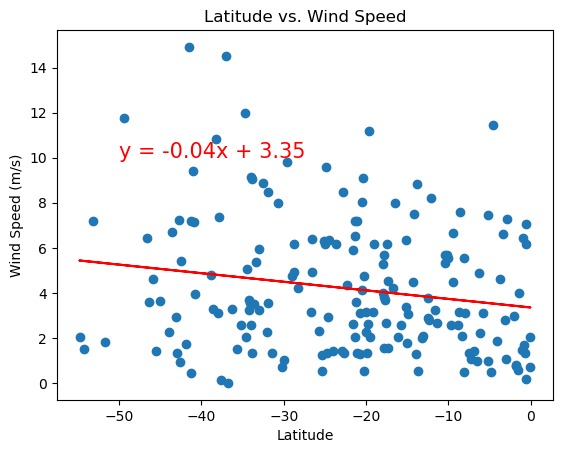

In [111]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"],
                       "Latitude vs. Wind Speed",
                       "Latitude",
                       "Wind Speed (m/s)",
                       (-50, 10))

**Discussion about the linear relationship:** The R-squared values for both hemispheres (0.01 and 0.03) are very close to zero. This suggests that there is almost no linear relationship between wind speed and latitude in either hemisphere. In other words, latitude does not seem to be a good predictor of wind speed based on the data analyzed. Overall, the Wind Speed vs. Latitude Linear Regression Plot shows that wind speed is largely independent of latitude, and other factors must be considered to explain variations in wind speed.